# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети

In [1]:
import cv2
import numpy as np
from scipy import misc
I = misc.ascent()

In [2]:
import numpy as np
import os
import tensorflow as tf
from __future__ import print_function
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical

In [3]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 5
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [ ]:
# инициализация  модели
input1= layers.Input(shape=(32,32,3))
# первый сверточный слой
x1 = layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="valid")(input1) #2828

# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1),  padding='same')(x1) #2828

# третий сверточный слой
x3 = layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x2)#2424

# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x3) #1212

# пятый  слой
x5 = layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x4) #88

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x6 = layers.Flatten()(x5)

# шестой полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)

# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)


# Соберем полную модель сети от входа к выходу 
model1 = Model(inputs = input1, outputs = out_x) 

# компилияция модели
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

# Обучаем модель
hist = model1.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=2)

test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/2
391/391 [==============================] - 38s 22ms/step - loss: 2.0193 - accuracy: 0.2762 - val_loss: 1.8532 - val_accuracy: 0.3478
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 1.7813 - accuracy: 0.3753
Test loss 1.7813, accuracy 37.53%


In [ ]:
def history_last(model):
    last = list(model.history.values())[-1][-1]
    return last

In [ ]:
history_last(hist)

0.37529999017715454

In [ ]:
first_note = [{'kernels': '32, 64, 120', "layers": '5/2', 'accuracy': history_last(hist)}]

In [ ]:
import pandas as pd
model_df = pd.DataFrame(first_note)
model_df

,kernels,layers,accuracy
0,"32, 64, 120",5/2,0.3753


In [ ]:
model_df

,kernels,layers,accuracy
0,"32, 64, 120",5/2,0.3619
1,"64, 128, 256",5/2,0.3782
2,"16, 32, 64",5/2,0.3672
3,"32, 64, 32",5/2,0.3535


In [ ]:
# инициализация  модели
input1= layers.Input(shape=(32,32,3))
# первый сверточный слой
x1 = layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="valid")(input1) #2828

# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1),  padding='same')(x1) #2828

# третий сверточный слой
x3 = layers.Conv2D(128, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x2)#2424

# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x3) #1212

# пятый  слой
x5 = layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x4) #88

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x6 = layers.Flatten()(x5)

# шестой полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)

# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)


# Соберем полную модель сети от входа к выходу 
model1 = Model(inputs = input1, outputs = out_x) 

# компилияция модели
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

# Обучаем модель
hist = model1.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/2
391/391 [==============================] - 19s 45ms/step - loss: 1.9895 - accuracy: 0.2865 - val_loss: 1.8420 - val_accuracy: 0.3507
Epoch 2/2
313/313 [==============================] - 3s 8ms/step - loss: 1.7720 - accuracy: 0.3763
Test loss 1.7720, accuracy 37.63%


In [ ]:
model_df.loc[len(model_df)] = [ '64, 128, 256', '5/2', history_last(hist)]

In [ ]:
# инициализация  модели
input1= layers.Input(shape=(32,32,3))
# первый сверточный слой
x1 = layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="valid")(input1) #2828

# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1),  padding='same')(x1) #2828

# третий сверточный слой
x3 = layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x2)#2424

# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x3) #1212

# пятый  слой
x5 = layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x4) #88

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x6 = layers.Flatten()(x5)

# шестой полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)

# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)


# Соберем полную модель сети от входа к выходу 
model1 = Model(inputs = input1, outputs = out_x) 

# компилияция модели
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

# Обучаем модель
hist = model1.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=2)

test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/2
391/391 - 5s - loss: 2.0396 - accuracy: 0.2587 - val_loss: 1.9523 - val_accuracy: 0.3031
Epoch 2/2
391/391 - 4s - loss: 1.8369 - accuracy: 0.3507 - val_loss: 1.7924 - val_accuracy: 0.3712
313/313 [==============================] - 1s 4ms/step - loss: 1.7924 - accuracy: 0.3712
Test loss 1.7924, accuracy 37.12%


In [ ]:
model_df.loc[len(model_df)] = [ '16, 32, 64', '5/2', history_last(hist)]

In [ ]:
# инициализация  модели
input1= layers.Input(shape=(32,32,3))
# первый сверточный слой
x1 = layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="valid")(input1) #2828

# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1),  padding='same')(x1) #2828

# третий сверточный слой
x3 = layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x2)#2424

# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x3) #1212

# пятый  слой
x5 = layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x4) #88

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x6 = layers.Flatten()(x5)

# шестой полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)

# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)


# Соберем полную модель сети от входа к выходу 
model1 = Model(inputs = input1, outputs = out_x) 

# компилияция модели
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

# Обучаем модель
hist = model1.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/2
391/391 [==============================] - 8s 19ms/step - loss: 2.0233 - accuracy: 0.2698 - val_loss: 1.8829 - val_accuracy: 0.3232
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 1.7710 - accuracy: 0.3724
Test loss 1.7710, accuracy 37.24%


In [ ]:
model_df.loc[len(model_df)] = [ '32, 64, 32', '5/2', history_last(hist)]

In [ ]:
# инициализация  модели
input1= layers.Input(shape=(32,32,3))
# первый сверточный слой
x1 = layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="valid")(input1) #28

# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1),  padding='same')(x1) #28

# третий сверточный слой
x3 = layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='valid')(x2) #2626

# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x3) #1313

# пятый  слой
x5 = layers.Conv2D(128, kernel_size=(4, 4), strides=(1, 1), activation='tanh', padding='valid')(x4) #1111

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x6 = layers.Flatten()(x5)

# шестой полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)

# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)


# Соберем полную модель сети от входа к выходу 
model1 = Model(inputs = input1, outputs = out_x) 

# компилияция модели
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

# Обучаем модель
hist = model1.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/2
391/391 [==============================] - 16s 40ms/step - loss: 1.9920 - accuracy: 0.2853 - val_loss: 1.8540 - val_accuracy: 0.3504
Epoch 2/2
313/313 [==============================] - 2s 7ms/step - loss: 1.7898 - accuracy: 0.3678
Test loss 1.7898, accuracy 36.78%


In [ ]:
model_df.loc[len(model_df)] = [ '64, 128, 128', '5/2', history_last(hist)]

In [ ]:
# инициализация  модели
input1= layers.Input(shape=(32,32,3))
# первый сверточный слой
x1 = layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="valid")(input1) #28

# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2),  padding='same')(x1) #14

# третий сверточный слой
x3 = layers.Conv2D(128, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid')(x2) #10

# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x3) #55


# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x6 = layers.Flatten()(x4)

# шестой полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)

# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)


# Соберем полную модель сети от входа к выходу 
model1 = Model(inputs = input1, outputs = out_x) 

# компилияция модели
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

# Обучаем модель
hist = model1.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/2
391/391 [==============================] - 7s 17ms/step - loss: 2.0835 - accuracy: 0.2450 - val_loss: 1.9516 - val_accuracy: 0.3006
Epoch 2/2
313/313 [==============================] - 1s 4ms/step - loss: 1.8545 - accuracy: 0.3487
Test loss 1.8545, accuracy 34.87%


In [ ]:
model_df.loc[len(model_df)] = [ '64, 128', '4/2', history_last(hist)]

In [ ]:
# инициализация  модели
input1= layers.Input(shape=(32,32,3))
# первый сверточный слой
x1 = layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  padding="valid")(input1) #28

# второй пуллинговый слой
x2 = layers.AveragePooling2D(pool_size=(1, 1), strides=(1, 1),  padding='same')(x1) #28

# третий сверточный слой
x3 = layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='valid')(x2) #26

# четвертый пуллинговый слой
x4 = layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x3) #13

x5 = layers.Conv2D(128, kernel_size=(4, 4), strides=(1, 1), activation='tanh', padding='valid')(x4) #10

# четвертый пуллинговый слой
x6 = layers.AveragePooling2D(pool_size=(1, 1), strides=(1, 1), padding='valid')(x5) #11

x7 = layers.Conv2D(256, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='valid')(x6) #7


# сглаживание CNN выхода чтобы можно было его присоединить к полносвязногому слою
x6 = layers.Flatten()(x7)

# шестой полносвязный слой
x7 = layers.Dense(84, activation='tanh')(x6)

# выходной слой с функцией активации softmax
out_x = layers.Dense(10, activation='softmax')(x7)


# Соберем полную модель сети от входа к выходу 
model1 = Model(inputs = input1, outputs = out_x) 

# компилияция модели
model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

# Обучаем модель
hist = model1.fit(x=x_train,y=y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=1)

test_score = model1.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/5
391/391 [==============================] - 39s 98ms/step - loss: 1.9317 - accuracy: 0.3162 - val_loss: 1.7875 - val_accuracy: 0.3759
Epoch 2/5
391/391 [==============================] - 38s 97ms/step - loss: 1.7718 - accuracy: 0.3801 - val_loss: 1.7317 - val_accuracy: 0.3948
Epoch 3/5
391/391 [==============================] - 38s 97ms/step - loss: 1.7020 - accuracy: 0.4067 - val_loss: 1.6486 - val_accuracy: 0.4221
Epoch 4/5
391/391 [==============================] - 38s 97ms/step - loss: 1.6165 - accuracy: 0.4354 - val_loss: 1.5934 - val_accuracy: 0.4376
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 1.5690 - accuracy: 0.4441
Test loss 1.5690, accuracy 44.41%


In [ ]:
model_df.loc[6] = [ '64, 128, 128', '7/2', history_last(hist)]

In [ ]:
model_df

,kernels,layers,accuracy
0,"32, 64, 120",5/2,0.3753
1,"64, 128, 256",5/2,0.3763
2,"16, 32, 64",5/2,0.3712
3,"32, 64, 32",5/2,0.3724
4,"64, 128, 128",5/2,0.3678
5,"64, 128",4/2,0.3487


In [ ]:
model2 = Sequential([
  Dense(3072, activation='sigmoid', input_shape=(32*32*3,)),
  Dense(1024, activation='sigmoid'),
  Dense(512, activation='relu'),
  Dense(10, activation='softmax'),
])


model2.compile(
  optimizer='SGD',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

print(model2.summary())

model_fit = model2.fit(train_images, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_67 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_68 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_69 (Dense)             (None, 10)                5130      
Total params: 13,116,938
Trainable params: 13,116,938
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
313/313 [==============================] - 4s 11ms/step - loss: 2.2911 - accuracy: 0.1250 - val_loss: 2.2724 - val_accuracy: 0.1474
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 2.2443 - accurac

In [ ]:
model_df.loc[7] = [ 'Полносвязная', '4', list(model2.history.history.values())[-1][-1]]

In [ ]:
model_df

,kernels,layers,accuracy
0,"32, 64, 120",5/2,0.3753
1,"64, 128, 256",5/2,0.3763
2,"16, 32, 64",5/2,0.3712
3,"32, 64, 32",5/2,0.3724
4,"64, 128, 128",5/2,0.3678
5,"64, 128",4/2,0.3487
6,"64, 128, 128",7/2,0.2696
7,Полносвязная,4,0.3424


## Вывод: 
Была построена модель сверточной нейросети на подобии AlexNet. При увеличении количества ядер, точность модели увеличивается, так же, как и при увеличении слоев. Полносвязная модель показала чуть ниже значение, чем сверточная нейронная сеть.

In [4]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (5, 5), padding='same', strides=(1,1), #28x28
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Использование data augmentation в реальном времени
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1563/1563 [==============================] - 32s 20ms/step - loss: 2.1427 - accuracy: 0.1928 - val_loss: 1.9070 - val_accuracy: 0.3141
Epoch 2/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.8572 - accuracy: 0.3209 - val_loss: 1.6707 - val_accuracy: 0.3918
Epoch 3/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7123 - accuracy: 0.3710 - val_loss: 1.5867 - val_accuracy: 0.4237
Epoch 4/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.6234 - accuracy: 0.4039 - val_loss: 1.4536 - val_accuracy: 0.4715
Epoch 5/5
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5396 - accuracy: 0.4365 - val_loss: 1.3824 - val_accuracy: 0.5044
сохранить обученную модель как /content/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 1s 3ms/step - loss: 1.3824 - accuracy: 0.5044
Test loss: 1.3824222087860107
Test accuracy: 0.5044000148773193


Что вернет ImageDataGenerator

In [ ]:
 model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test))

Epoch 1/5
   9/1563 [..............................] - ETA: 23s - loss: 1.5147 - accuracy: 0.4236

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1563/1563 [==============================] - 26s 17ms/step - loss: 1.4752 - accuracy: 0.4614 - val_loss: 1.4024 - val_accuracy: 0.5024
Epoch 2/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4256 - accuracy: 0.4816 - val_loss: 1.2786 - val_accuracy: 0.5494
Epoch 3/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3890 - accuracy: 0.4979 - val_loss: 1.2230 - val_accuracy: 0.5676
Epoch 4/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3523 - accuracy: 0.5131 - val_loss: 1.2604 - val_accuracy: 0.5575
Epoch 5/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3225 - accuracy: 0.5244 - val_loss: 1.1823 - val_accuracy: 0.5722


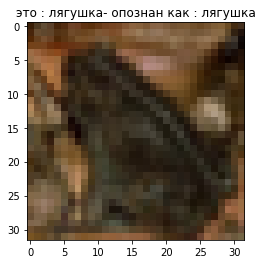

In [ ]:
N = 30
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()